<a href="https://colab.research.google.com/github/yioqse/Visionado---Ejercicios/blob/main/Ejercicio_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Comparativa de Técnicas de Detección de Características en Imágenes

Esta tabla compara distintas técnicas de procesamiento de imágenes usadas para detectar bordes, texturas, esquinas y características robustas.

| Técnica         | Tipo de Detección         | Descripción                                         | Ventajas                                     | Limitaciones                               | Aplicaciones Comunes                         |
|-----------------|---------------------------|-----------------------------------------------------|----------------------------------------------|---------------------------------------------|------------------------------------------------|
| **Sobel**       | Bordes (Gradiente)         | Filtro de derivada simple que detecta bordes en direcciones X e Y. | Rápido, simple, fácil de aplicar.            | Sensible al ruido, bordes gruesos.          | Análisis de contornos, pre-procesamiento.     |
| **Canny**       | Bordes (Preciso)           | Detector multietapa, optimizado para detectar bordes finos y bien definidos. | Muy preciso, buen control de bordes.         | Mayor coste computacional, requiere ajustar umbrales. | Reconocimiento de formas, segmentación.       |
| **Laplacian**   | Texturas / Bordes          | Derivada de segundo orden que resalta detalles finos y bordes. | Detecta detalles sutiles, isotrópico.        | Amplifica el ruido, resultados menos claros. | Realce de detalles, análisis de texturas.     |
| **Filtro Gabor**| Textura Direccional        | Filtro que simula la percepción humana, sensible a frecuencias y orientaciones. | Excelente para texturas, análisis frecuencial.| Sensible a parámetros, más complejo.        | Análisis de texturas, biometría (huellas, iris). |
| **Harris**      | Esquinas                   | Detector de esquinas robusto que identifica cambios rápidos en intensidad. | Robusto, buena detección de esquinas.        | No invariante a escala, sensible a parámetros. | Detección de esquinas, tracking simple.        |
| **Shi-Tomasi**  | Esquinas Mejoradas         | Variante mejorada de Harris, selecciona puntos con mejor respuesta. | Más estable y preciso que Harris.             | Limitado a esquinas fuertes.                | Seguimiento de puntos, tracking.               |
| **SIFT**        | Características Escala/Rotación | Detecta y describe características robustas a escala, rotación e iluminación. | Muy robusto, invariante a escala y rotación. | Computacionalmente pesado, restricciones de licencia. | Emparejamiento, reconocimiento de objetos.     |

---

## ✅ Notas:
- La elección del método depende del problema a resolver y de las condiciones de la imagen.
- Técnicas como **Canny** o **Sobel** son buenas para detectar bordes rápidamente.
- Si necesitas reconocer objetos a pesar de la rotación o escala, usa **SIFT**.
- Para texturas complejas, **Gabor** ofrece resultados avanzados.



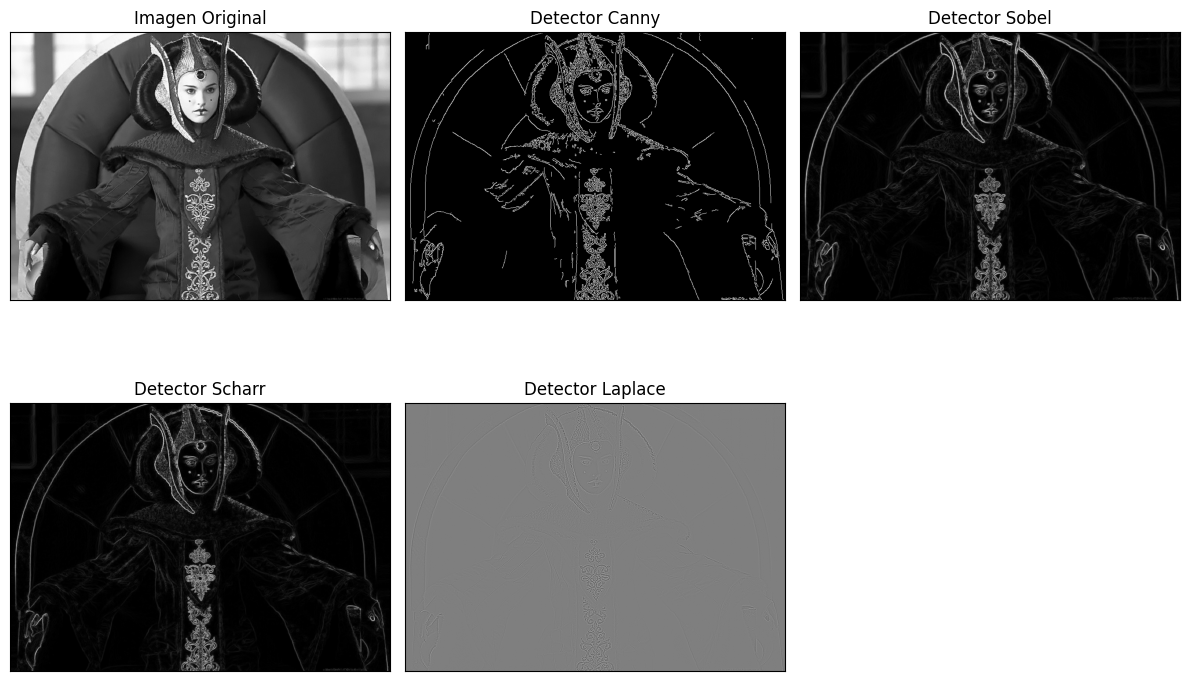

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


# Cargar la imagen
# Puedes reemplazar 'ruta/a/tu/imagen.jpg' con la ruta a tu propia imagen
# Si no tienes una imagen, puedes descargar una de ejemplo o usar una de las que vienen con OpenCV
try:
    image = cv2.imread('amidala.jpg', cv2.IMREAD_GRAYSCALE) # Cargar en escala de grises para simplificar

    if image is None:
        # Si la imagen no se encuentra localmente, intentar descargar una de ejemplo
        print("Imagen no encontrada localmente. Descargando una imagen de ejemplo...")
        import requests
       # image_url = "https://static.wikia.nocookie.net/esstarwars/images/0/0d/Reina_Amidala.jpg/revision/latest?cb=20080808001232"
        response = requests.get(image_url)
        with open("amidala.jpg", "wb") as f:
            f.write(response.content)
        image = cv2.imread('amidala.jpg', cv2.IMREAD_GRAYSCALE)
        if image is None:
            print("Error al descargar o cargar la imagen de ejemplo.")
            raise FileNotFoundError("No se pudo cargar la imagen. Pero te cargo la de lana")
            image = cv2.imread('lena.jpg', cv2.IMREAD_GRAYSCALE)


    # Aplicar detector de bordes Canny
    canny_edges = cv2.Canny(image, 100, 200) # Los umbrales pueden ajustarse

    # Aplicar detector de bordes Sobel en X y Y y combinarlos
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_edges = np.sqrt(sobelx**2 + sobely**2)

    # Aplicar detector de bordes Scharr en X y Y y combinarlos
    scharrx = cv2.Scharr(image, cv2.CV_64F, 1, 0)
    scharry = cv2.Scharr(image, cv2.CV_64F, 0, 1)
    scharr_edges = np.sqrt(scharrx**2 + scharry**2)

    # Aplicar detector de bordes Laplace
    laplacian_edges = cv2.Laplacian(image, cv2.CV_64F)

    # Mostrar los resultados
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 3, 1), plt.imshow(image, cmap='gray')
    plt.title('Imagen Original'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 3, 2), plt.imshow(canny_edges, cmap='gray')
    plt.title('Detector Canny'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 3, 3), plt.imshow(sobel_edges, cmap='gray')
    plt.title('Detector Sobel'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 3, 4), plt.imshow(scharr_edges, cmap='gray')
    plt.title('Detector Scharr'), plt.xticks([]), plt.yticks([])

    plt.subplot(2, 3, 5), plt.imshow(laplacian_edges, cmap='gray')
    plt.title('Detector Laplace'), plt.xticks([]), plt.yticks([])

    plt.tight_layout()
    plt.show()

except FileNotFoundError as e:
    print(f"Error: {e}. Asegúrate de que la ruta de la imagen es correcta o que tienes conexión a internet para descargar la imagen de ejemplo.")
except Exception as e:
    print(f"Ocurrió un error: {e}")